# Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

#  Load the dataset

In [2]:
df = pd.read_csv("D:/downloads 2/loan_data.csv")

# Handle Missing Data

In [13]:
df.replace("?", np.nan, inplace=True)
df.fillna(method='ffill', inplace=True)

C:\Users\Sandipan Jana\AppData\Local\Temp\ipykernel_4008\924046604.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


# Encode Categorical Columns

In [4]:
le = LabelEncoder()
df['Education'] = le.fit_transform(df['Education'])      
df['Married'] = le.fit_transform(df['Married'])          
df['LoanApproved'] = le.fit_transform(df['LoanApproved'])

# Prepare Features and Target

In [5]:
X = df.drop("LoanApproved", axis=1)
y = df["LoanApproved"]

# Split into Train and Test sets

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression Model

In [7]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

C:\Users\Sandipan Jana\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# Train Random Forest Model

In [8]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

#  Evaluation Function

In [9]:
def evaluate_model(model, name):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    print(f"\n{name} - Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    print(f"\n{name} - Classification Report:")
    print(classification_report(y_test, y_pred))

    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

# Plot ROC Curves for Both Models


Logistic Regression - Confusion Matrix:
[[ 0 14]
 [ 1 25]]

Logistic Regression - Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       0.64      0.96      0.77        26

    accuracy                           0.62        40
   macro avg       0.32      0.48      0.38        40
weighted avg       0.42      0.62      0.50        40


Random Forest - Confusion Matrix:
[[ 2 12]
 [ 4 22]]

Random Forest - Classification Report:
              precision    recall  f1-score   support

           0       0.33      0.14      0.20        14
           1       0.65      0.85      0.73        26

    accuracy                           0.60        40
   macro avg       0.49      0.49      0.47        40
weighted avg       0.54      0.60      0.55        40



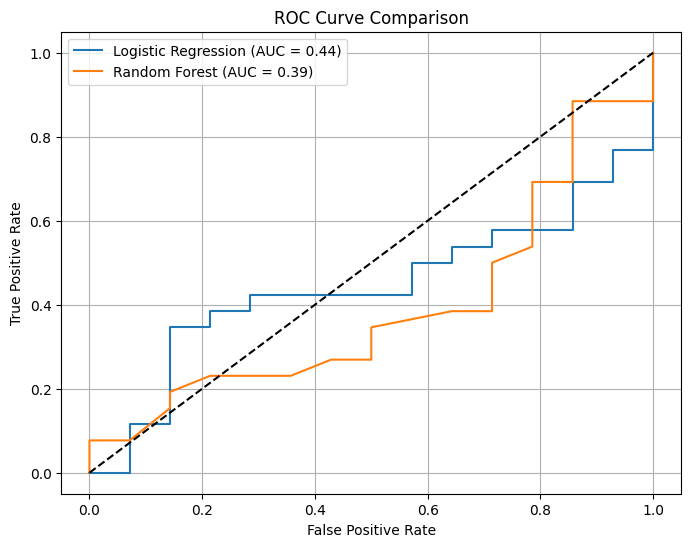

In [10]:
plt.figure(figsize=(8, 6))
evaluate_model(lr_model, "Logistic Regression")
evaluate_model(rf_model, "Random Forest")
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()

# Predict for a new applicant